In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse,accuracy_score as ac
from sklearn.cluster import KMeans 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm





Problem 3: Use the Wine dataset for this problem 4 . However, for this problem, use the cosine similarity
measure on the features to convert the dataset to a graph with weighted edges and attributed nodes, where
each node corresponds to a data point with attributes and each edge is weighted by the similarity measure.
1. Apply unnormalized spectral clustering to the data, as in problem 2.2. Visualize the graph with node
colors corresponding to the clustering obtained and save it as “3.1.1.png”. Compare it with the
ground truth labels. Also visualize the graph with node colors corresponding to the ground truth labels
and save it as “3.1.2.png”

In [2]:
from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
wine_data=pd.read_csv('/content/gdrive/My Drive/datasets/lab_as3/wine.data',header=None)
wine_data.describe()
wine_features=wine_data.values[:,1:]
wine_labels=wine_data.values[:,0]
wine_labels.shape

(178,)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity as cs


sim_mat=cs(wine_features)
sim_mat.shape

(178, 178)

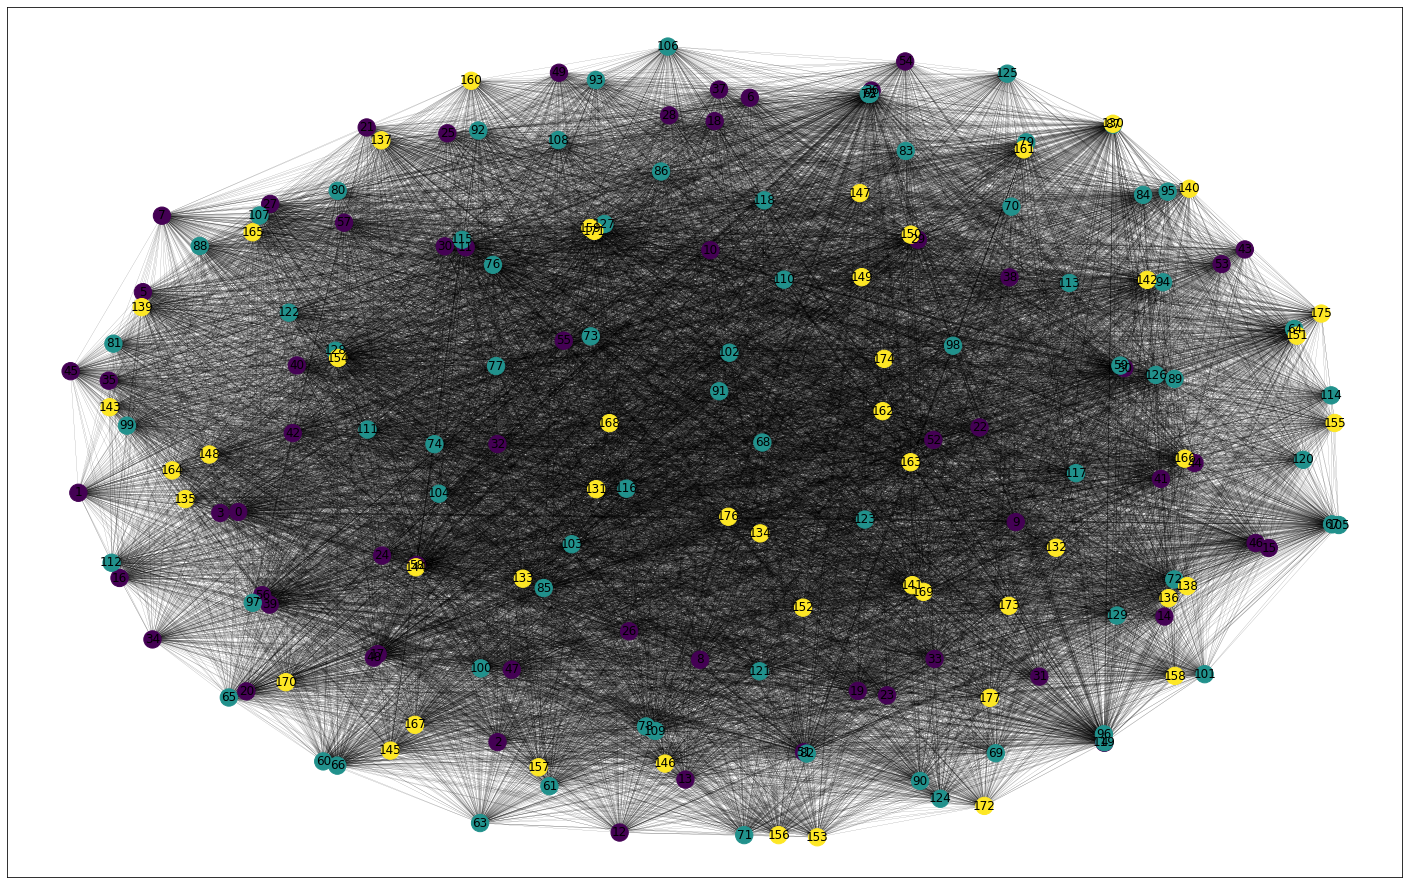

In [5]:
import networkx as nx 


G=nx.from_numpy_matrix(sim_mat)
G.nodes
plt.figure(figsize=(25,16))
nx.draw_networkx(G,node_color=wine_labels,width=.1)



In [6]:
adja=nx.to_numpy_matrix(G)
adja=np.array(adja)
adja


array([[1.        , 0.99970923, 0.99942997, ..., 0.99963251, 0.99966619,
        0.99814223],
       [0.99970923, 1.        , 0.99993601, ..., 0.99872827, 0.99878339,
        0.99650948],
       [0.99942997, 0.99993601, 1.        , ..., 0.99825894, 0.99832077,
        0.99586111],
       ...,
       [0.99963251, 0.99872827, 0.99825894, ..., 1.        , 0.99999691,
        0.9993902 ],
       [0.99966619, 0.99878339, 0.99832077, ..., 0.99999691, 1.        ,
        0.99935151],
       [0.99814223, 0.99650948, 0.99586111, ..., 0.9993902 , 0.99935151,
        1.        ]])

In [7]:
degree_mat=np.zeros((len(G.nodes),len(G.nodes)))

for i in range (len(adja)):
  s=0
  for j in range (len(adja[0])):
      s+=adja[i][j]
  degree_mat[i][i]=s
degree_mat

array([[177.57392044,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 177.36683073,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 177.27123241, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 177.68663095,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        177.68579662,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 177.65540773]])

In [8]:
L=degree_mat-adja
from numpy.linalg import svd


u,d,v=svd(L)
# v[-1]
fd=np.array(v[-2])
# fd=fd[0]
fd=fd.reshape(-1,1)
km=KMeans(n_clusters=3)
lab=km.fit_predict(fd)
lab

# nx.draw_networkx(G,node_color=svd_color)

# print(mse(wine_labels,svd_color))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

using spectral clustering 

In [12]:
from sklearn.manifold import spectral_embedding as se


spec=se(nx.adjacency_matrix(G),n_components=1)
spec
km=KMeans(n_clusters=3)
lab=km.fit_predict(spec)
lab


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

tackling the label discripancy problem

In [0]:
pred_lab=[i+1 for i in lab]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
0.6966292134831461


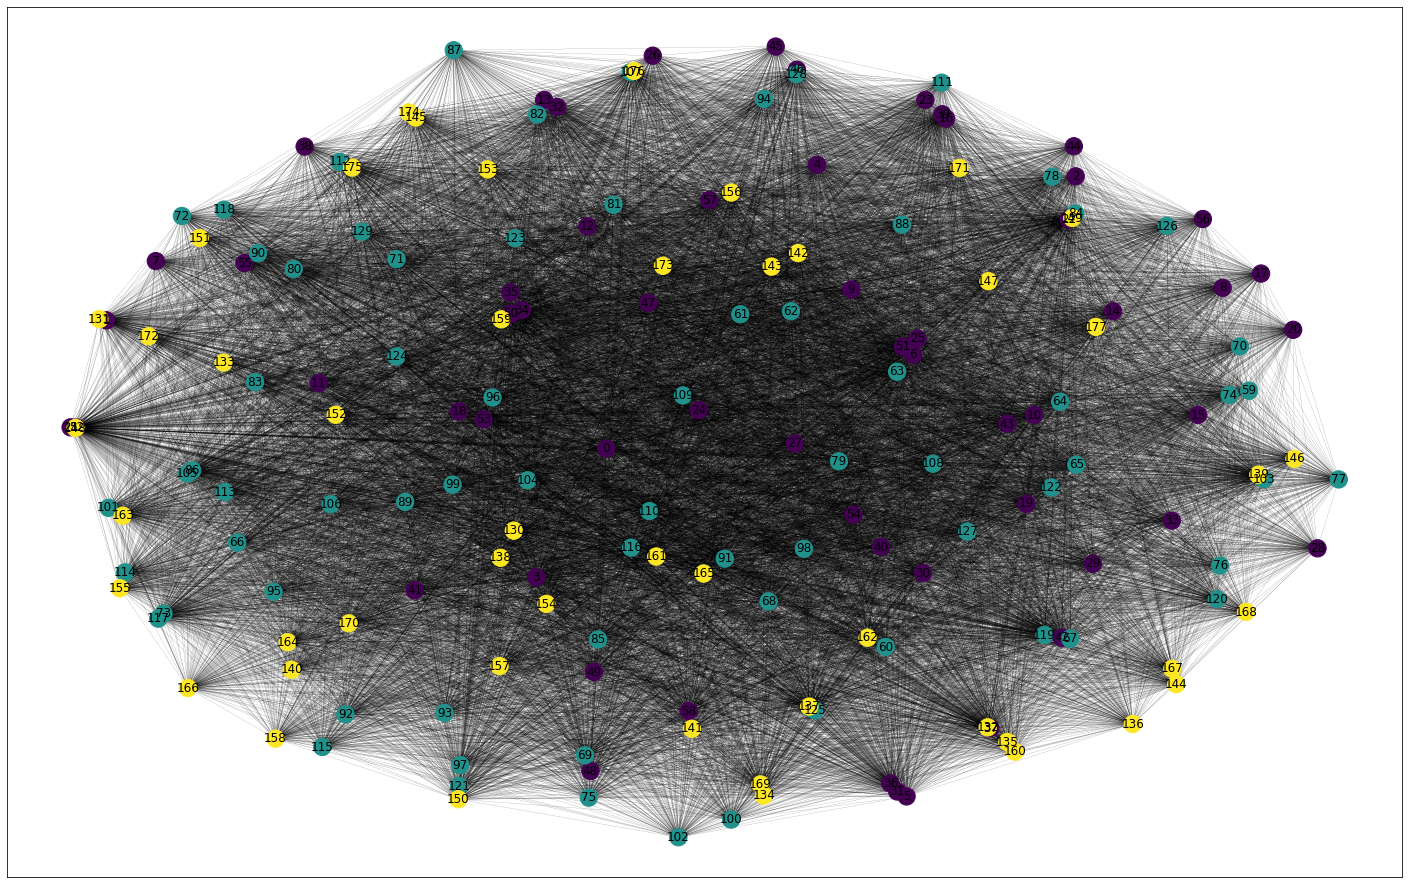

In [17]:
plt.figure(figsize=(25,16))
nx.draw_networkx(G,node_color=wine_labels,width=.1)
print(wine_labels)
print(ac(wine_labels,pred_lab))